### New giotto-time features: crest factor detrending and sorted density

*Created by:* Helena Peic Tukuljac, February 2020 

*Blog post:* "Crest factor detrending and sorted density in acoustic data with giotto-time" ADD LINK

*Summary:* This notebook provides a tutorial for time series analysis with [giotto-time](https://github.com/giotto-ai/giotto-time). The goal is to do time series analysis with generalized trend removal and also sorted density characterization.

*Data:* Data comes from the simulated and measured impulse responses used in the following publication:
H. P. Tukuljac, V. Pulkki, H. Gamper, K. Godin, I. J. Tashev and N. Raghuvanshi, "A Sparsity Measure for Echo Density Growth in General Environments," ICASSP 2019 - 2019 IEEE International Conference on Acoustics, Speech and Signal Processing (ICASSP), Brighton, United Kingdom, 2019, pp. 1-5.
URL: http://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8682878&isnumber=8682151


*Contents:*
* Crest factor deternding
* Sorted density feature
* Exponential curve fitting in log(t) domain

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py

### Data in H5 format

In [25]:
with h5py.File('data.h5', 'r') as hf:
    Fs = list(hf['Fs'])
    dataset_simulation_polybox = list(hf['dataset_simulation_polybox'])
    dataset_simulation_sliding_lid = list(hf['dataset_simulation_sliding_lid'])
    dataset_measurement_volume = list(hf['dataset_measurement_volume'])

### Data as pandas series

In [15]:
dictionary = {'polybox1' : dataset_simulation_polybox[0], 
              'polybox2' : dataset_simulation_polybox[1], 
              'polybox3' : dataset_simulation_polybox[2]}
data_simulation_polybox = pd.DataFrame(data = dictionary, index = pd.timedelta_range(start=pd.Timedelta(days=0), freq=str(round(1000/Fs[0], 5)) + 'ms', 
                                   periods=len(dataset_simulation_polybox[0])))
data_simulation_polybox.head()

,polybox1,polybox2,polybox3
00:00:00,0.000000e+00,0.000000e+00,0.000000e+00
00:00:00.000170,7.475587e-07,7.604145e-07,7.445461e-07
00:00:00.000340,2.198212e-05,2.231809e-05,2.193096e-05
00:00:00.000510,7.384641e-05,7.500967e-05,7.366796e-05
00:00:00.000680,3.275091e-05,3.326645e-05,3.260609e-05


In [16]:
dictionary = {'closed' : dataset_simulation_sliding_lid[0], 
              'almost_closed' : dataset_simulation_sliding_lid[1], 
              'almost_open' : dataset_simulation_sliding_lid[2], 
              'open' : dataset_simulation_sliding_lid[3]}
data_simulation_sliding_lid = pd.DataFrame(data = dictionary, index = pd.timedelta_range(start=pd.Timedelta(days=0), freq=str(round(1000/Fs[1], 5)) + 'ms', 
                                   periods=len(dataset_simulation_sliding_lid[0])))
data_simulation_sliding_lid.head()

,closed,almost_closed,almost_open,open
00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
00:00:00.000170,4.443116e-07,4.372601e-07,4.443116e-07,4.456350e-07
00:00:00.000340,1.300656e-05,1.283440e-05,1.300656e-05,1.303693e-05
00:00:00.000510,4.364509e-05,4.311583e-05,4.364509e-05,4.377377e-05
00:00:00.000680,1.987153e-05,1.957845e-05,1.987153e-05,1.991281e-05


In [21]:
dictionary = {'small_volume' : dataset_measurement_volume[0], 
              'medium_volume' : dataset_measurement_volume[1], 
              'large_volume' : dataset_measurement_volume[2]}
data_measurement_volume = pd.DataFrame(data = dictionary, index = pd.timedelta_range(start=pd.Timedelta(days=0), freq=str(round(1000/Fs[2], 5)) + 'ms', 
                                   periods=len(dataset_measurement_volume[0])))
data_measurement_volume.head()

,small_volume,medium_volume,large_volume
00:00:00,7.397113e-23,-6.647863e-07,-2.717659e-07
00:00:00.000062,8.979711e-09,-1.057012e-06,-4.507983e-07
00:00:00.000125,5.946165e-08,-4.774106e-06,-1.991513e-06
00:00:00.000187,3.970893e-08,-6.295568e-06,-2.688895e-06
00:00:00.000250,1.141448e-07,-1.107776e-05,-4.685962e-06


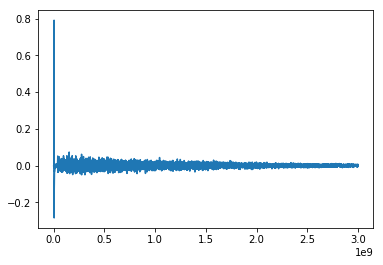

In [22]:
plt.plot(data_simulation_polybox['polybox1'])

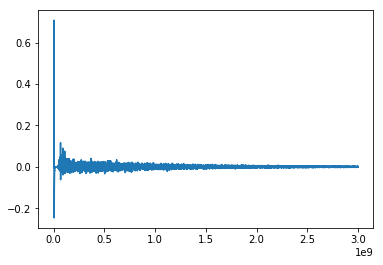

In [23]:
plt.plot(data_simulation_sliding_lid['closed'])

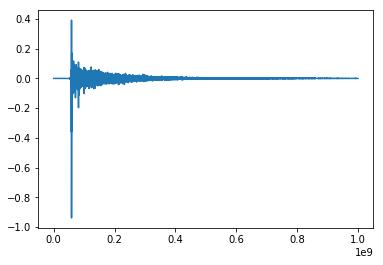

In [24]:
plt.plot(data_measurement_volume['small_volume'])